# Decision Tree - Wine Quality Dataset

## Overview
A Decision Tree is a supervised learning algorithm that recursively splits
the feature space to make predictions. Decision Trees are easy to interpret
but can overfit without proper constraints.

In this notebook, we use a Decision Tree classifier to predict
wine quality as **high** or **low**.


# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 2. Load Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

X = data.drop('quality', axis=1).values
y = (data['quality'] >= 6).astype(int).values  # Binary target

data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Preprocessing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 4. Train Decision Tree Model

In [5]:
model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.7312


# 5. Evaluation

In [6]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:
 [[108  41]
 [ 45 126]]

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       149
           1       0.75      0.74      0.75       171

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320



# 6. Visualization

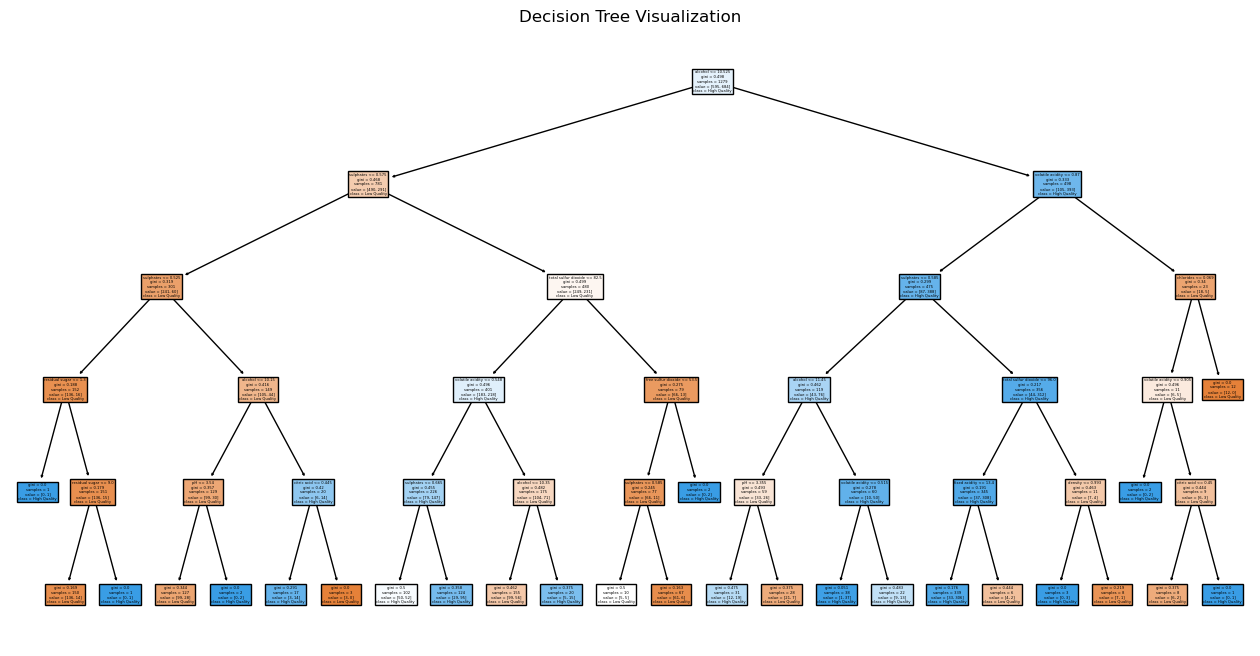

In [7]:
plt.figure(figsize=(16,8))
plot_tree(
    model,
    feature_names=data.drop('quality', axis=1).columns,
    class_names=["Low Quality", "High Quality"],
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()


# 7. Testing

In [8]:
# 1. Shape checks
assert X_train.shape[0] == y_train.shape[0], "Training data mismatch"
assert X_test.shape[0] == y_test.shape[0], "Testing data mismatch"

# 2. Prediction shape
assert y_pred.shape == y_test.shape, "Prediction shape mismatch"

# 3. Accuracy sanity check
assert 0.5 <= accuracy <= 1.0, f"Unexpected accuracy: {accuracy}"

# 4. Tree depth check
assert model.get_depth() <= 5, "Tree depth exceeds specified max_depth"

# 5. Reproducibility
model2 = DecisionTreeClassifier(max_depth=5, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

np.testing.assert_array_equal(y_pred, y_pred2)

print("All tests passed ✅")


All tests passed ✅


# 8. Summary & Discussion

- The Decision Tree achieved strong classification performance on the Wine Quality dataset.
- The model required minimal preprocessing and no feature scaling.
- Limiting tree depth helped reduce overfitting while maintaining accuracy.
- Decision Trees are highly interpretable but sensitive to small data changes.
- Inline testing ensures the model is correct, reproducible, and robust.
